# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Bambee Garfield

[Bambee's Module 7 GitHub](https://github.com/Bambee26/CSIS44620_Module7)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 1</span>


1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [37]:
import requests

# URL of the article
url = "https://rover.com/blog/role-assistance-dogs-recovering-substance-abuse/"

# Define a custom user agent
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to fetch the webpage content with custom headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the HTML content to a file
    with open("rover_article.html", "w", encoding="utf-8") as file:
        file.write(response.text)
        
    print("Article content saved to rover_article.html")
else:
    print("Failed to retrieve the article. Status code:", response.status_code)


Article content saved to rover_article.html


<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 2</span>


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [38]:
from textblob import TextBlob
from bs4 import BeautifulSoup

# Read the HTML content from the file
with open("rover_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the article content
article_text = soup.get_text()

# Perform sentiment analysis
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

# Truncate polarity score to two decimal places
truncated_score = round(polarity_score, 2)

# Count the number of sentences
sentences = blob.sentences
num_sentences = len(sentences)

# Print the sentiment polarity score and number of sentences
print("Sentiment Polarity Score:", truncated_score)
print("Number of Sentences in the Article:", num_sentences)


Sentiment Polarity Score: 0.15
Number of Sentences in the Article: 98


<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 3</span>


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [39]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup
from tabulate import tabulate

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Read the HTML content from the file
with open("rover_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the article content
article_text = soup.get_text()

# Process the article text with spaCy
doc = nlp(article_text)

# Convert tokens to lowercase and filter out stopwords, punctuation, spaces, and non-alphabetic tokens
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha]

# Get token frequencies
token_freq = Counter(tokens)

# Sort tokens by frequency in descending order
sorted_tokens = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)

# Create a table for the tokens and frequencies
table_data = [("Token", "Frequency")]
for token, freq in sorted_tokens:
    table_data.append((token, freq))

# Print the table
print(tabulate(table_data, headers="firstrow"))


Token                Frequency
-----------------  -----------
dogs                        74
dog                         69
therapy                     41
service                     27
help                        21
training                    20
support                     20
people                      15
names                       14
recovery                    13
pet                         13
animal                      12
assistance                  12
emotional                   11
tasks                       10
find                         9
organizations                9
treatment                    8
visits                       7
patients                     7
provide                      7
addiction                    6
love                         6
rover                        6
substance                    6
animals                      6
pets                         6
process                      6
list                         6
resources                    6
time    

<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 4</span>


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [40]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Read the HTML content from the file
with open("rover_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the article content
article_text = soup.get_text()

# Process the article text with spaCy
doc = nlp(article_text)

# Collect lemmas and their frequencies, excluding spaces and non-words
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop and token.lemma_ != "-PRON-"]

# Get lemma frequencies
lemma_freq = Counter(lemmas)

# Sort lemmas by frequency numerically
sorted_lemmas_freq = sorted(lemma_freq.items(), key=lambda x: (-x[1], x[0]))

# Get the top 5 most frequent lemmas
top_5_lemmas = sorted_lemmas_freq[:5]

# Print the top 5 most common lemmas alphabetically
print("Top 5 Common Lemmas:")
for lemma, frequency in top_5_lemmas:
    print(lemma)

# Print lemmas and their frequencies numerically
print("\nLemmas and Frequencies (Sorted Numerically):")
for lemma, frequency in sorted_lemmas_freq:
    print(f"{lemma}: {frequency}")


Top 5 Common Lemmas:
dog
therapy
service
help
dogs

Lemmas and Frequencies (Sorted Numerically):
dog: 119
therapy: 41
service: 28
help: 26
dogs: 24
support: 20
pet: 19
animal: 18
training: 18
people: 15
find: 14
names: 14
need: 13
patient: 13
provide: 13
recovery: 13
assistance: 12
organization: 12
emotional: 11
task: 11
train: 10
assist: 9
benefit: 8
care: 8
treatment: 8
individual: 7
love: 7
owner: 7
process: 7
visit: 7
addiction: 6
certification: 6
esd: 6
international: 6
list: 6
offer: 6
require: 6
rover: 6
substance: 6
time: 6
way: 6
abuse: 5
act: 5
behavior: 5
companionship: 5
medical: 5
perform: 5
program: 5
puppy: 5
resource: 5
unique: 5
volunteer: 5
condition: 4
disability: 4
good: 4
health: 4
history: 4
hospital: 4
housing: 4
include: 4
partners: 4
positive: 4
purpose: 4
reduce: 4
sense: 4
team: 4
type: 4
work: 4
able: 3
accommodation: 3
accompany: 3
allow: 3
available: 3
black: 3
brain: 3
capacity: 3
cat: 3
certain: 3
certify: 3
clinic: 3
companion: 3
course: 3
dedicate: 3
d

<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 5</span>


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

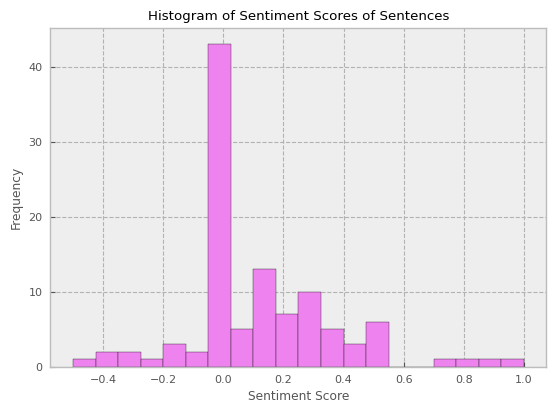

In [41]:
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Set the matplotlib style
plt.style.use('seaborn-v0_8-pastel')

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Read the HTML content from the file
with open("rover_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the article content
article_text = soup.get_text()

# Process the article text with spaCy
doc = nlp(article_text)

# Tokenize the sentences and compute scores for each sentence
sentence_scores = []
for sentence in doc.sents:
    # Tokenize the sentence and compute the average sentiment score for the tokens
    sentence_tokens = [token.text for token in sentence if not token.is_stop and not token.is_punct]
    if sentence_tokens:
        sentence_text = " ".join(sentence_tokens)
        sentence_blob = TextBlob(sentence_text)
        sentence_score = sentence_blob.sentiment.polarity
        sentence_scores.append(sentence_score)

# Plot a histogram of the sentence scores with violet color
plt.hist(sentence_scores, bins=20, color='violet', edgecolor='black')
plt.title('Histogram of Sentiment Scores of Sentences')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Sentiment scores range from -1 to 1. -1 is considered highly negative, where 1 is considered highly positive. For this article, the majority of the sentiment scores are neutral at 0 or slightly postive. 

<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 6</span>


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

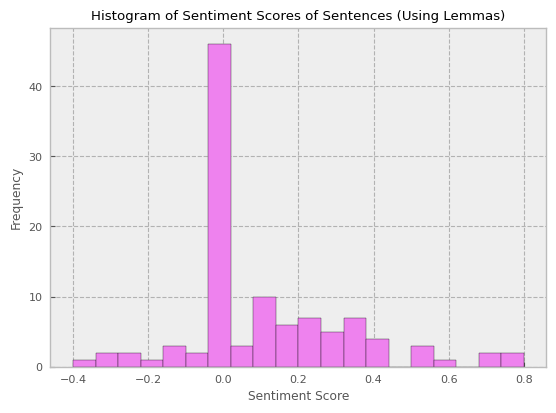

In [42]:
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Read the HTML content from the file
with open("rover_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the article content
article_text = soup.get_text()

# Process the article text with spaCy
doc = nlp(article_text)

# Tokenize the sentences and compute scores for each sentence
sentence_scores = []
for sentence in doc.sents:
    # Tokenize the sentence and compute the average sentiment score for the lemmas
    sentence_lemmas = [token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct]
    if sentence_lemmas:
        sentence_text = " ".join(sentence_lemmas)
        sentence_blob = TextBlob(sentence_text)
        sentence_score = sentence_blob.sentiment.polarity
        sentence_scores.append(sentence_score)

# Plot a histogram of the sentence scores
plt.hist(sentence_scores, bins=20, color='VIOLET', edgecolor='black')
plt.title('Histogram of Sentiment Scores of Sentences (Using Lemmas)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Sentiment scores remain very similar using lemmas. The majority are neutral at 0, with the majority falling neutral or slightly positive. 

<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 7</span>


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

<span style="color: violet; font-family: Verdana; font-weight: bold">Cutoff Score (tokens): 0.1</span>  
<span style="color: violet; font-family: Verdana; font-weight: bold">Cutoff Score (lemmas): 0.05</span>




<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 8</span>


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [45]:
# Initialize an empty list to store sentences that meet the criteria for the summary
summary_sentences = []

# Cutoff Score (tokens): 0.1 (as determined in question 7)
cutoff_score_tokens = 0.1

# Iterate through every sentence in the article
for sentence in doc.sents:
    # Tokenize the sentence and compute the average sentiment score for the tokens
    sentence_tokens = [token.text for token in sentence if not token.is_stop and not token.is_punct]
    if sentence_tokens:
        sentence_text = " ".join(sentence_tokens)
        sentence_blob = TextBlob(sentence_text)
        sentence_score = sentence_blob.sentiment.polarity
        # Check if the sentence score is greater than the cutoff score
        if sentence_score > cutoff_score_tokens:
            # Add the cleaned sentence to the summary list
            summary_sentences.append(sentence.text.strip())

# Print the summary without large blank spaces
summary_text = ' '.join(summary_sentences).strip()
print(summary_text)


| The Dog People by Rover.com































 








    Skip to primary navigation Skip to main content Skip to primary sidebarThe Dog People by Rover.comPowered by Rover.comTips, stories, and reviews for people who love dogs, powered by Rover.com, the world's largest network of 5-star pet sitters and dog walkers. MenuThe Dog People by Rover.comGet Rover

Boarding
House Sitting
Dog Walking
Doggy Day Care
Drop-In Visits
Dog Training through Good Pup


Dog Breeds

Golden Retriever
Australian Shepherd
German Shepherd
Pomeranian
Shih Tzu
Border Collie
Labrador Retriever
Boxer
Beagle
Dachshund
Chihuahua
Poodle
Yorkshire Terrier


Dog Names

Best Girl Dog Names
Top Boy Dog Names
Unique Dog Names
Cute Dog Names
Best Puppy Names
Dog Name Generator
Tough Dog Names
Food Dog Names
Romantic Dog Names
Literary Dog Names
Country Dog Names


Dog Videos
Life with Dogs

Dog Safety
Dog Behavior
Dog Psychology
Dog Nutrition
Dog Training
Health and Wellness
Recipes
Can My Dog Eat…?


Pu

<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 9</span>


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [46]:
# Calculate the polarity score of the summary
summary_blob = TextBlob(summary_text)
summary_polarity_score = summary_blob.sentiment.polarity

# Count the number of sentences in the summarized article
num_sentences_summary = len(summary_sentences)

# Print the polarity score of the summary and the number of sentences
print("Polarity Score of the Summary (based on token scores):", round(summary_polarity_score, 2))
print("Number of Sentences in the Summarized Article:", num_sentences_summary)


Polarity Score of the Summary (based on token scores): 0.26
Number of Sentences in the Summarized Article: 46


<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 10</span>


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [47]:
# Initialize an empty list to store sentences that meet the criteria for the summary
summary_sentences_lemmas = []

# Cutoff Score (lemmas): 0.05 (as determined in question 7)
cutoff_score_lemmas = 0.05

# Iterate through every sentence in the article
for sentence in doc.sents:
    # Tokenize the sentence and compute the average sentiment score for the lemmas
    sentence_lemmas = [token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct]
    if sentence_lemmas:
        sentence_text = " ".join(sentence_lemmas)
        sentence_blob = TextBlob(sentence_text)
        sentence_score = sentence_blob.sentiment.polarity
        # Check if the sentence score is greater than the cutoff score
        if sentence_score > cutoff_score_lemmas:
            # Add the sentence to the summary list
            summary_sentences_lemmas.append(sentence.text.strip())

# Print the summary
summary_text_lemmas = ' '.join(summary_sentences_lemmas)
print(summary_text_lemmas)


| The Dog People by Rover.com































 








    Skip to primary navigation Skip to main content Skip to primary sidebarThe Dog People by Rover.comPowered by Rover.comTips, stories, and reviews for people who love dogs, powered by Rover.com, the world's largest network of 5-star pet sitters and dog walkers. MenuThe Dog People by Rover.comGet Rover

Boarding
House Sitting
Dog Walking
Doggy Day Care
Drop-In Visits
Dog Training through Good Pup


Dog Breeds

Golden Retriever
Australian Shepherd
German Shepherd
Pomeranian
Shih Tzu
Border Collie
Labrador Retriever
Boxer
Beagle
Dachshund
Chihuahua
Poodle
Yorkshire Terrier


Dog Names

Best Girl Dog Names
Top Boy Dog Names
Unique Dog Names
Cute Dog Names
Best Puppy Names
Dog Name Generator
Tough Dog Names
Food Dog Names
Romantic Dog Names
Literary Dog Names
Country Dog Names


Dog Videos
Life with Dogs

Dog Safety
Dog Behavior
Dog Psychology
Dog Nutrition
Dog Training
Health and Wellness
Recipes
Can My Dog Eat…?


Pu

<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 11</span>


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 12</span>


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

<span style="color: VIOLET; font-family: Verdana; font-weight: bold; font-size: larger;">Module 7, Question 13</span>


13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?